In [265]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange, uniform
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats 
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [266]:
#Loading the csv
bike_rental =  pd.read_csv("day.csv")

In [267]:
bike_rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [268]:
bike_rental.shape

(731, 16)

In [269]:
bike_rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [270]:
#Calculating the null values in the dataframe
missing_value = pd.DataFrame(bike_rental.isnull().sum())
missing_value = (missing_value/len(bike_rental))*100
#missing_value.reset_index()
missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})


missing_value

,Missing_percentage
instant,0.0
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0


In [271]:
bike_rental.dteday = pd.to_datetime(bike_rental.dteday)

In [272]:
print (bike_rental.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null datetime64[ns]
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(11)
memory usage: 91.5 KB
None


# EDA

(array([231.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

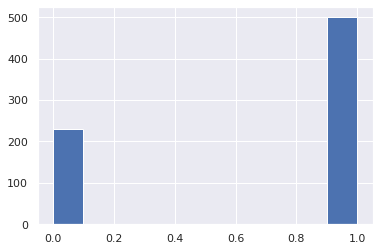

In [273]:
plt.hist(x='workingday', data=bike_rental)

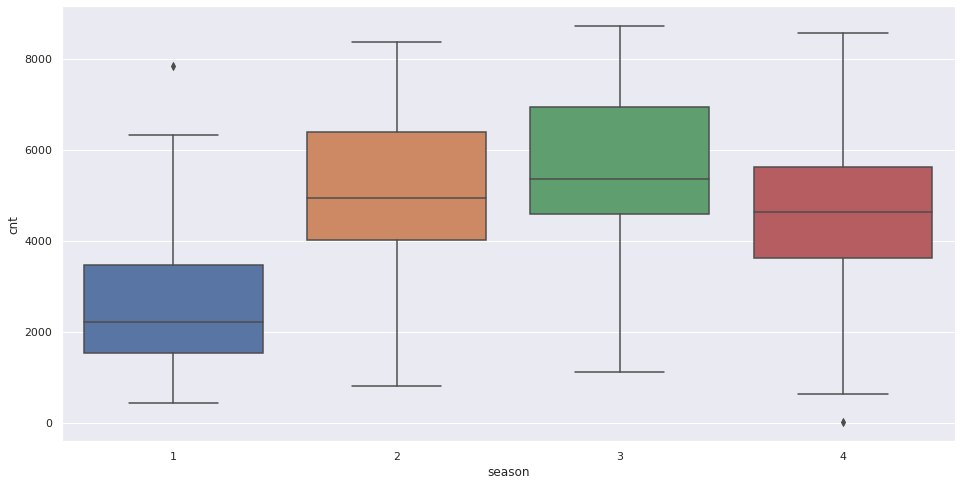

In [274]:
plt.figure(figsize=(16,8))
sns.boxplot(x='season', y='cnt', data=bike_rental)

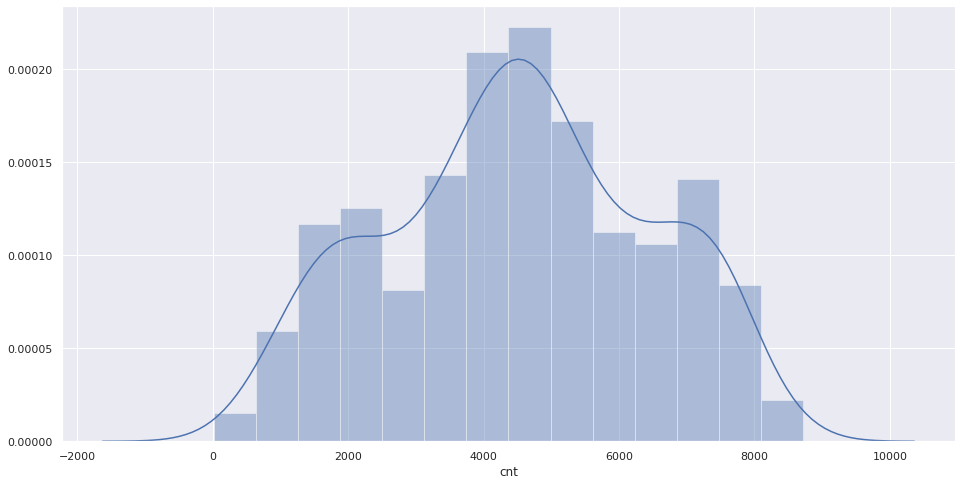

In [275]:
plt.figure(figsize=(16,8))
sns.distplot(bike_rental['cnt'])
plt.show()

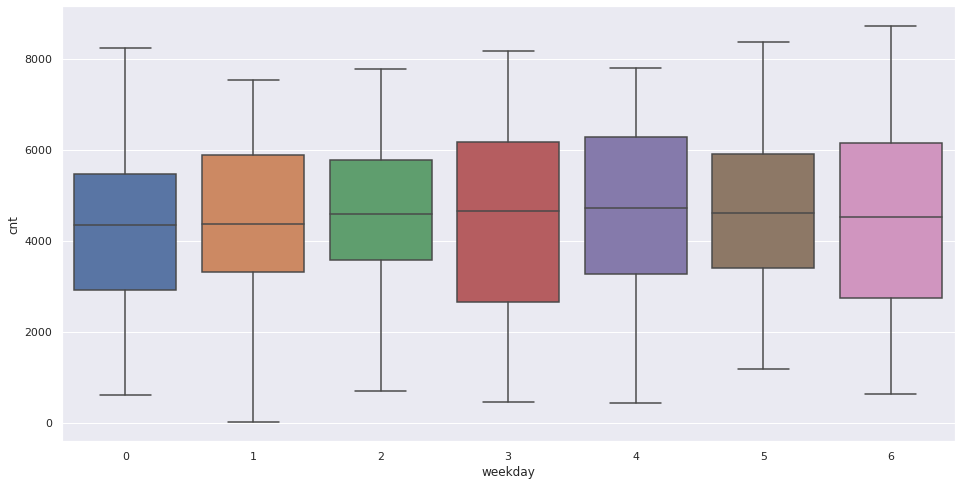

In [276]:
plt.figure(figsize=(16,8))
sns.boxplot(x='weekday',y='cnt', data=bike_rental)

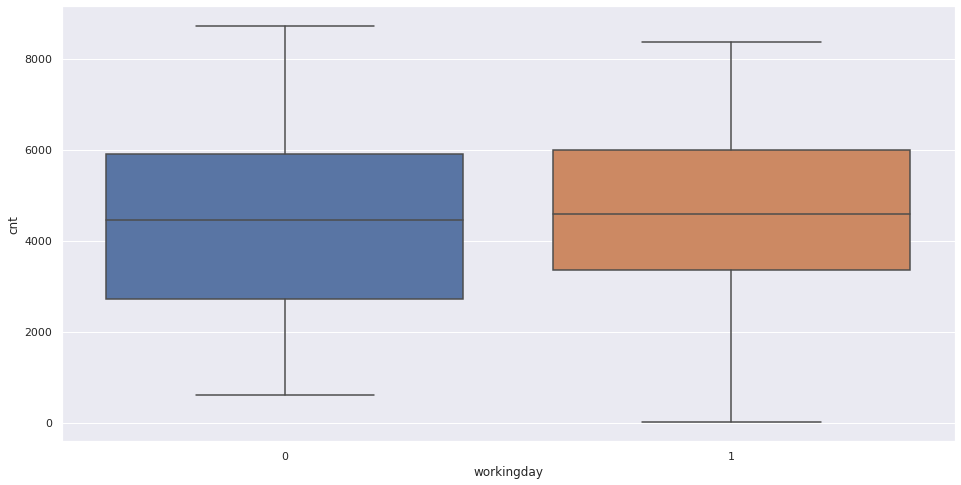

In [279]:
plt.figure(figsize=(16,8))
sns.boxplot(x='workingday',y='cnt', data=bike_rental)

# OUTLIER ANALYSIS

{'whiskers': [<matplotlib.lines.Line2D at 0x7f250345b898>,
 'caps': [<matplotlib.lines.Line2D at 0x7f250345bf98>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f250345b470>],
 'medians': [<matplotlib.lines.Line2D at 0x7f25034646d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2503464a58>],
 'means': []}

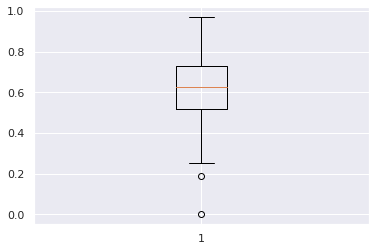

In [169]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_rental['hum'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f25033be4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f25033bec18>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f25033be080>],
 'medians': [<matplotlib.lines.Line2D at 0x7f25033bef28>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f25033ff940>],
 'means': []}

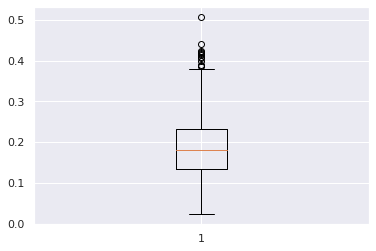

In [170]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_rental['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2503392f28>,
 'caps': [<matplotlib.lines.Line2D at 0x7f25033a0978>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2503392da0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f25033a0e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f250332b438>],
 'means': []}

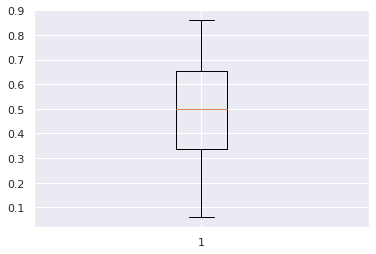

In [171]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_rental['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f24fd2a6fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f24fd2b4710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f24fd2a6ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f24fd2b4e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f24fd2b4f28>],
 'means': []}

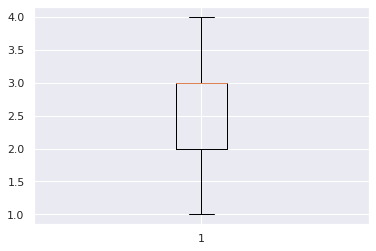

In [172]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_rental['season'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f24fd215358>,
 'caps': [<matplotlib.lines.Line2D at 0x7f24fd215a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f24fd289ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f24fd215ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f24fd21f518>],
 'means': []}

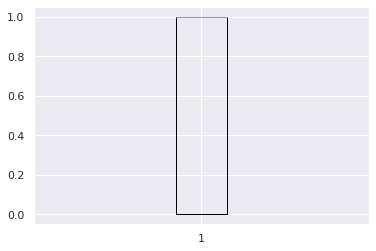

In [173]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_rental['yr'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f24fd1ebf60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f24fd1f8940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f24fd1ebdd8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f24fd1f8dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f24fd203400>],
 'means': []}

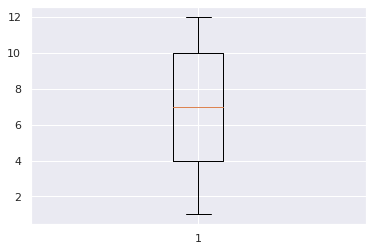

In [174]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_rental['mnth'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f24fd1cde48>,
 'caps': [<matplotlib.lines.Line2D at 0x7f24fd15a5f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f24fd1cda20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f24fd15acf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f24fd15ae10>],
 'means': []}

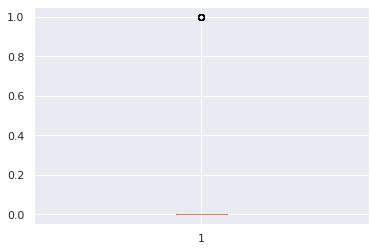

In [175]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_rental['holiday'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f24fd12fcc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f24fd13c470>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f24fd12f898>],
 'medians': [<matplotlib.lines.Line2D at 0x7f24fd13cb70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f24fd13cef0>],
 'means': []}

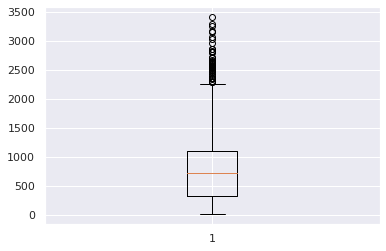

In [176]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_rental['casual'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f24fd09e588>,
 'caps': [<matplotlib.lines.Line2D at 0x7f24fd09ec88>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f24fd09e160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f24fd0aa3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f24fd0aa748>],
 'means': []}

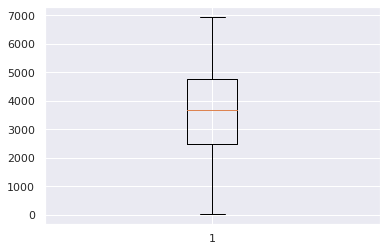

In [177]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_rental['registered'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f24fd07ccf8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f24fd0884a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f24fd07c8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f24fd088ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f24fd088f28>],
 'means': []}

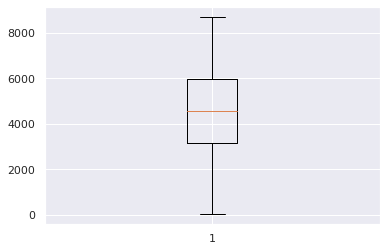

In [178]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_rental['cnt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f24fcfe1588>,
 'caps': [<matplotlib.lines.Line2D at 0x7f24fcfe1cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f24fcfe1160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f24fcfeb438>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f24fcfeb7b8>],
 'means': []}

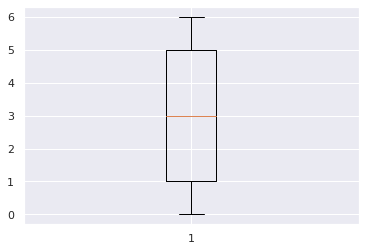

In [179]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_rental['weekday'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f24fcfc6780>,
 'caps': [<matplotlib.lines.Line2D at 0x7f24fcfc6e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f24fcfc6358>],
 'medians': [<matplotlib.lines.Line2D at 0x7f24fcfd05c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f24fcfd0940>],
 'means': []}

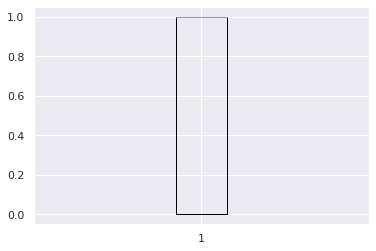

In [180]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_rental['workingday'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f24fcf27550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f24fcf27cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f24fcf27128>],
 'medians': [<matplotlib.lines.Line2D at 0x7f24fcf34400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f24fcf34780>],
 'means': []}

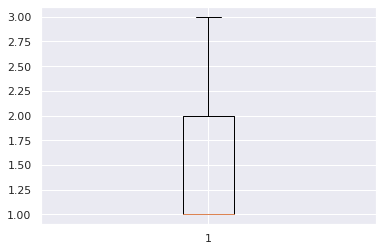

In [181]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_rental['weathersit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f24fce91438>,
 'caps': [<matplotlib.lines.Line2D at 0x7f24fce91b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f24fcf04fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f24fce91fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f24fcedfc18>],
 'means': []}

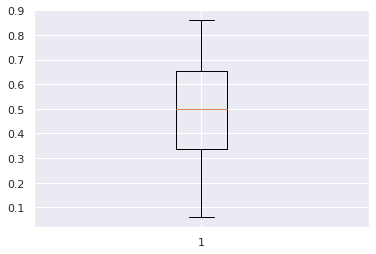

In [182]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_rental['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f24fce6ce80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f24fce7d8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f24fce6ccf8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f24fce7dfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f24fce7df60>],
 'means': []}

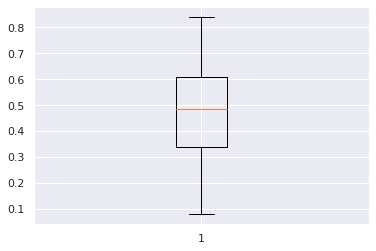

In [183]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_rental['atemp'])

In [184]:
cnames = ["dteday","yr","season","mnth","workingday","weekday","weathersit","temp","atemp","hum","windspeed", "casual", "cnt", "registered"]
pnames = ["temp","hum","windspeed"]

In [185]:
for i in pnames :
    print (i)
    q75,q25 = np.percentile(bike_rental.loc[:,i],[75,25])
    iqr = q75-q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print (min)
    print (max)
    
    bike_rental = bike_rental.drop(bike_rental[bike_rental.loc[:,i] < min].index)
    bike_rental = bike_rental.drop(bike_rental[bike_rental.loc[:,i] > max].index)

temp
-0.14041600000000015
1.1329160000000003
hum
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585


In [186]:
bike_rental['dteday'] = pd.to_datetime(bike_rental['dteday'],yearfirst=True)
bike_rental['season'] = bike_rental['season'].astype('category')
bike_rental['yr'] = bike_rental['yr'].astype('category')
bike_rental['mnth'] = bike_rental['mnth'].astype('category')
bike_rental['holiday'] = bike_rental['holiday'].astype('category')
bike_rental['weekday'] = bike_rental['weekday'].astype('category')
bike_rental['workingday'] = bike_rental['workingday'].astype('category')
bike_rental['weathersit'] = bike_rental['weathersit'].astype('category')

bike_rental['temp'] = bike_rental['temp'].astype('float')
bike_rental['atemp'] = bike_rental['atemp'].astype('float')
bike_rental['hum'] = bike_rental['hum'].astype('float')
bike_rental['windspeed'] = bike_rental['windspeed'].astype('float')
bike_rental['casual'] = bike_rental['casual'].astype('float')
bike_rental['registered'] = bike_rental['registered'].astype('float')
bike_rental['cnt'] = bike_rental['cnt'].astype('float')

In [188]:
Q1 = bike_rental.quantile(0.25)
Q3 = bike_rental.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

instant        365.000000
temp             0.319167
atemp            0.273182
hum              0.208334
windspeed        0.096392
casual         802.000000
registered    2262.000000
cnt           2817.000000
dtype: float64


In [189]:
bike_rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


/home/priyanka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


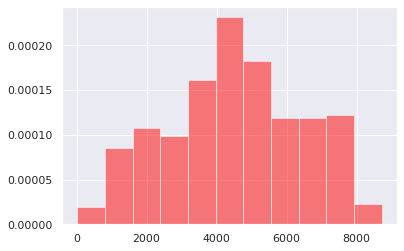

In [190]:
#Distribution of cnt
%matplotlib inline

num_bins = 11
plt.hist(bike_rental['cnt'], num_bins, normed=1, facecolor='red', alpha=0.5)
plt.show()

mnth
1     61
2     53
3     58
4     58
5     62
6     60
7     62
8     62
9     60
10    60
11    60
12    61
dtype: int64


Text(0, 0.5, 'Total Bikes Rented')

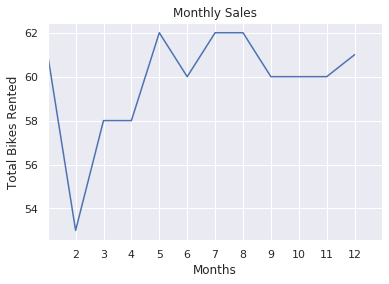

In [191]:
#Bike Rentals Monthly
sales_by_month = bike_rental.groupby('mnth').size()
print(sales_by_month)
#Plotting the Graph
plot_by_month = sales_by_month.plot(title='Monthly Sales',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total Bikes Rented')

# Feature Selection

In [196]:
#Selection of feature  based  on pearson corelation 

day_numeric = bike_rental.loc[:,['temp','atemp','hum','instant', 'season','windspeed','casual','registered','cnt','dteday','yr','season','mnth','workingday','weekday','weathersit']]
pnames = ["temp","hum","windspeed"]


In [155]:
#draw  correlation matrix between all  numeric variables and analyse  what are the variables are important

day_numeric.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,temp,atemp,hum,instant,windspeed,casual,registered,cnt,dteday
temp,1.0,0.99,0.11,0.15,-0.14,0.54,0.54,0.63,nan
atemp,0.99,1.0,0.13,0.16,-0.17,0.54,0.54,0.63,nan
hum,0.11,0.13,1.0,7.5e-05,-0.2,-0.1,-0.12,-0.14,nan
instant,0.15,0.16,7.5e-05,1.0,-0.11,0.28,0.66,0.63,nan
windspeed,-0.14,-0.17,-0.2,-0.11,1.0,-0.15,-0.2,-0.22,nan
casual,0.54,0.54,-0.1,0.28,-0.15,1.0,0.39,0.67,nan
registered,0.54,0.54,-0.12,0.66,-0.2,0.39,1.0,0.94,nan
cnt,0.63,0.63,-0.14,0.63,-0.22,0.67,0.94,1.0,nan
dteday,nan,nan,nan,nan,nan,nan,nan,nan,nan


/home/priyanka/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


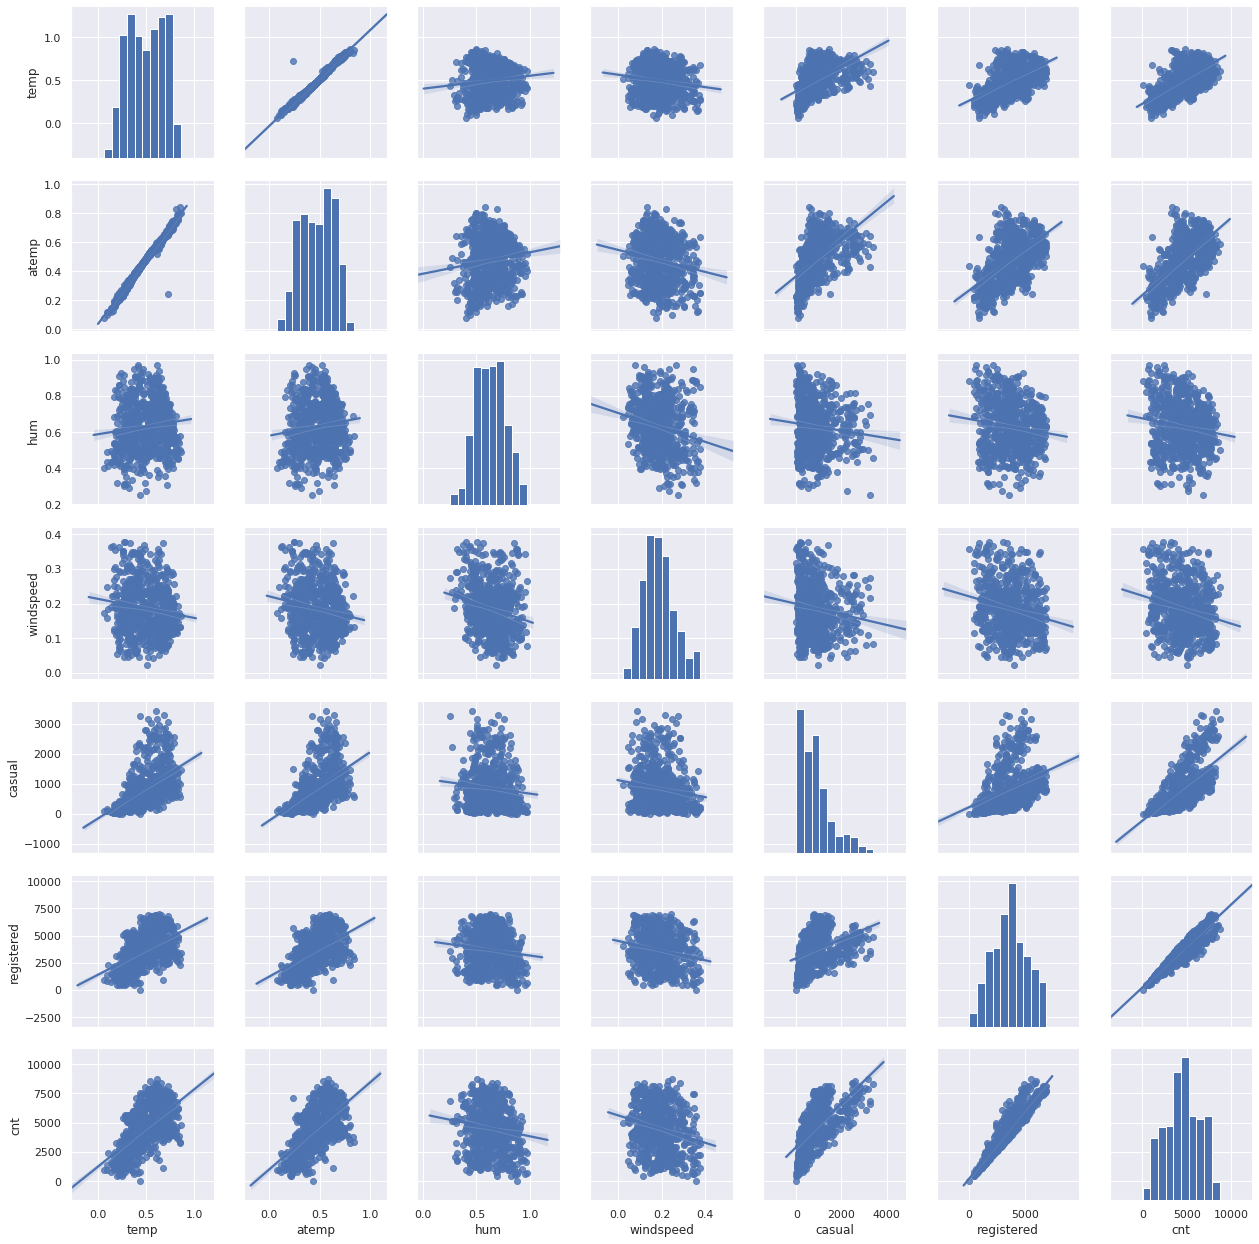

In [150]:

# check relationship with scatter plots

sns.set()
cols = (['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'])
sns.pairplot(day_numeric[cols], size = 2.5,kind="reg")
plt.show()

In [193]:
#Removing variable 'atemp' beacuse it is highly correlated with 'temp'
#There is a poor relation between  Independent variable 'hum' and dependent  variable 'cnt'
#So dropping 
numeric_features = day_numeric.loc[:,['temp', 'windspeed', 'casual', 'registered', 'cnt']]

numeric_features.head()

#numeric_features.shape

,temp,windspeed,casual,registered,cnt
0,0.344167,0.160446,331.0,654.0,985.0
1,0.363478,0.248539,131.0,670.0,801.0
2,0.196364,0.248309,120.0,1229.0,1349.0
3,0.200000,0.160296,108.0,1454.0,1562.0
4,0.226957,0.186900,82.0,1518.0,1600.0



# MODEL

In [224]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = bike_rental[['instant','season', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp','hum', 'yr', 'mnth', 'windspeed','casual']]
y = bike_rental['cnt']

In [229]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

In [230]:
x_train

,instant,season,holiday,workingday,weathersit,temp,atemp,hum,yr,mnth,windspeed,casual
399,400,1,0,0,2,0.264167,0.272725,0.779583,1,2,0.121896,384.0
581,582,3,0,0,1,0.793333,0.751267,0.613333,1,8,0.257458,2345.0
260,261,3,0,0,1,0.507500,0.490537,0.695000,0,9,0.178483,1353.0
13,14,1,0,1,1,0.160870,0.188413,0.537826,0,1,0.126548,54.0
391,392,1,0,1,2,0.425000,0.415383,0.741250,1,1,0.342667,269.0
180,181,3,0,1,1,0.696667,0.637008,0.434167,0,6,0.185312,1027.0
386,387,1,0,0,2,0.162500,0.162250,0.796250,1,1,0.199638,196.0
79,80,2,0,1,2,0.430435,0.409735,0.737391,0,3,0.288783,401.0
61,62,1,0,1,1,0.198333,0.200133,0.318333,0,3,0.225754,123.0
264,265,3,0,1,2,0.628333,0.554963,0.902083,0,9,0.128125,555.0


In [231]:
y_train

399    2832.0
581    6824.0
260    4274.0
13     1421.0
391    3456.0
180    5515.0
386    1977.0
79     2077.0
61     1685.0
264    4795.0
698    5323.0
121    4401.0
206    4590.0
583    7013.0
602    6053.0
1       801.0
256    4785.0
218    3785.0
317    4486.0
199    4541.0
457    5936.0
644    7965.0
627    7591.0
665    7852.0
684    5445.0
337    3485.0
671    5847.0
210    4475.0
237    4661.0
192    4258.0
        ...  
194    5084.0
719    4128.0
525    7498.0
622    8009.0
492    6273.0
658    8090.0
138    4575.0
214    3574.0
421    3389.0
330    3071.0
208    4390.0
378    2493.0
422    4322.0
348    3709.0
32     1526.0
331    3867.0
58     1446.0
661    7466.0
607    7713.0
544    6879.0
137    3855.0
496    7030.0
336    3614.0
359    1317.0
109    3944.0
198    4458.0
115    4400.0
176    5305.0
717    5557.0
67     1891.0
Name: cnt, Length: 645, dtype: float64

In [232]:
x_test

,instant,season,holiday,workingday,weathersit,temp,atemp,hum,yr,mnth,windspeed,casual
605,606,3,0,1,1,0.728333,0.666050,0.620000,1,8,0.190925,935.0
689,690,4,0,1,2,0.374167,0.380667,0.685000,1,11,0.082725,534.0
478,479,2,0,1,2,0.321667,0.301125,0.766667,1,4,0.303496,195.0
538,539,3,0,1,1,0.777500,0.724121,0.573750,1,6,0.182842,964.0
603,604,3,0,0,2,0.653333,0.595996,0.845833,1,8,0.228858,1483.0
480,481,2,0,1,1,0.476667,0.470317,0.427917,1,4,0.118792,655.0
724,725,1,1,0,2,0.291304,0.294465,0.734783,1,12,0.168726,440.0
513,514,2,1,0,1,0.712500,0.679300,0.676250,1,5,0.196521,2557.0
62,63,1,0,1,2,0.261667,0.255679,0.610417,0,3,0.203346,214.0
454,455,2,0,1,2,0.370000,0.375621,0.580833,1,3,0.138067,796.0


In [233]:
y_test

605    7040.0
689    5634.0
478    3214.0
538    5823.0
603    5255.0
480    6196.0
724    1013.0
513    6043.0
62     1944.0
454    5459.0
618    7525.0
82     1865.0
141    4660.0
21      981.0
673    5107.0
649    7570.0
445    6230.0
404    3830.0
224    4150.0
641    7572.0
11     1162.0
161    4966.0
251    3544.0
47     2475.0
367    2236.0
335    3940.0
448    3372.0
370    4098.0
711    5319.0
254    4713.0
        ...  
8       822.0
381    2935.0
423    4363.0
693    2277.0
202    3387.0
447    8362.0
646    5478.0
647    6392.0
187    4592.0
398    4151.0
564    5713.0
631    7907.0
165    5180.0
709    5170.0
132    4105.0
311    4205.0
531    7665.0
474    6565.0
111    1683.0
720    3623.0
374    3598.0
312    4109.0
563    6786.0
191    4086.0
676    5035.0
716    4585.0
555    6569.0
677    5315.0
225    3820.0
628    7720.0
Name: cnt, Length: 72, dtype: float64

In [234]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 5000,random_state= 42)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [235]:
rf_prediction = rf.predict(x_test)

In [236]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, rf_prediction))

MSE: 446870.46659429173


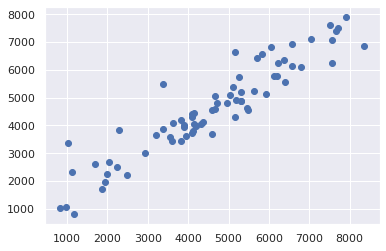

In [237]:
plt.scatter(y_test,rf_prediction)

In [238]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [239]:
dt_prediction = dt_reg.predict(x_test)

In [240]:
print('MSE:', metrics.mean_squared_error(y_test, dt_prediction))

MSE: 643925.5972222222


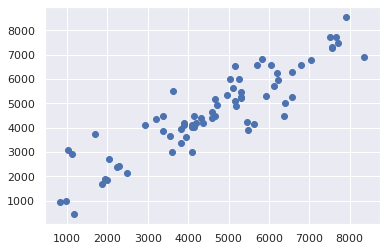

In [241]:
plt.scatter(y_test,dt_prediction)

In [259]:
d={'cnt':rf_prediction}

In [260]:
ans=pd.DataFrame(d)
ans.to_csv('answer.csv',index=False)

In [261]:
e={'cnt':dt_prediction}

In [263]:
ns=pd.DataFrame(e)
ns.to_csv('submission.csv',index=False)